## Kruskal's Algorithm
### About 	
Kruskal's algorithm is a minimum spanning tree algorithm that takes a graph as input and finds the subset of the edges of that graph which

1. form a tree that includes every vertex
2. has the minimum sum of weights among all the trees that can be formed from the graph

### Algorithm
The steps for implementing Kruskal's algorithm are as follows:

1. Sort all the edges from low weight to high
2. Take the edge with the lowest weight and add it to the spanning tree. If adding the edge created a cycle, then reject this edge.
3. Keep adding edges until we reach all vertices.

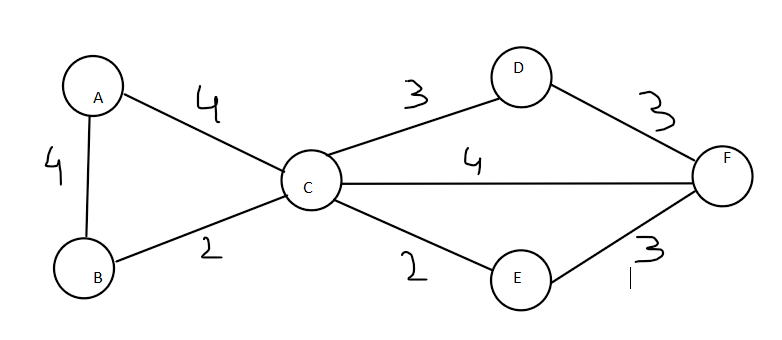

In [13]:
class Graph:
    def __init__(self, vertices):
        self.V = len(vertices)
        self.vertex_map = {}  # Mapping of node names to indices
        self.graph = []

        # Assign an index to each node
        for i, node in enumerate(vertices):
            self.vertex_map[node] = i

    def add_edge(self, u, v, w):
        u_index = self.vertex_map[u]
        v_index = self.vertex_map[v]
        self.graph.append([u_index, v_index, w])

    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])

    def apply_union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1

    def kruskal_algo(self):
        result = []
        i, e, total_weight = 0, 0, 0        
        self.graph = sorted(self.graph, key=lambda item: item[2])
        parent = {node: node for node in range(self.V)}
        rank = {node: 0 for node in range(self.V)}
        while e < self.V - 1:
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.apply_union(parent, rank, x, y)
                total_weight += w
        for u, v, weight in result:
            # Retrieve the node names using the vertex_map
            u_node = next(key for key, value in self.vertex_map.items() if value == u)
            v_node = next(key for key, value in self.vertex_map.items() if value == v)
            print("%s - %s: %d" % (u_node, v_node, weight))
        print("Total Weight: ", total_weight)


g = Graph(['A', 'B', 'C', 'D', 'E', 'F'])

g.add_edge('A', 'B', 4)
g.add_edge('A', 'C', 4)
g.add_edge('B', 'C', 2)
g.add_edge('C', 'D', 3)
g.add_edge('C', 'E', 2)
g.add_edge('C', 'F', 4)
g.add_edge('D', 'F', 3)
g.add_edge('E', 'F', 3)

g.kruskal_algo()


B - C: 2
C - E: 2
C - D: 3
D - F: 3
A - B: 4
Total Weight:  14


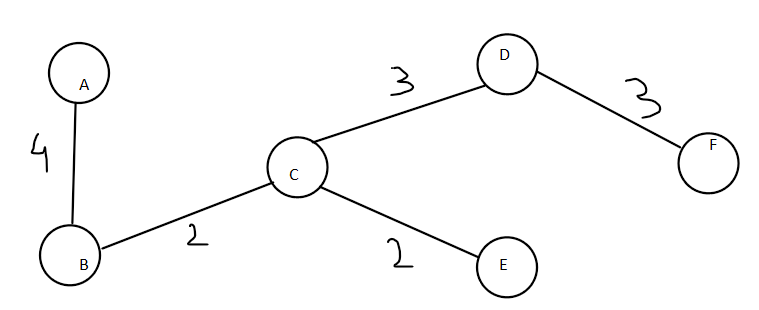